# Lab: Regression Analysis

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [47]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

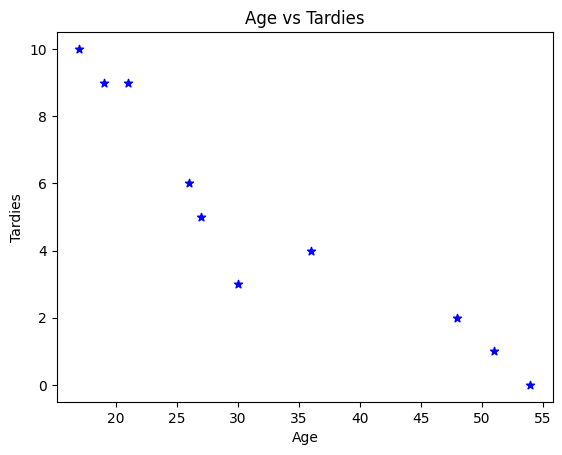

In [48]:
plt.scatter(student_data['Age'], student_data['Tardies'], marker='*', color='blue')

plt.xlabel('Age')
plt.ylabel('Tardies');
plt.title('Age vs Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [49]:
# Answer: As age increases, the number of tardies decreases

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [50]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [51]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [52]:
# covariance = relationship between the variability of 2 variables -it is scale dependent because it is not standardized

covariance = student_data[['Age', 'Tardies']].cov()
covariance = covariance.loc['Age', 'Tardies']
print(f'Covariance is: {covariance}')

# correlation = relationship between the variability of of 2 variables - it is standardized making it not scale dependent
correlation = student_data[['Age', 'Tardies']].corr()
correlation = correlation.loc['Age', 'Tardies']
print(f'Correlation is: {correlation}')

# Answers:
# - Covariance: Indicates negative relationship between the two variables 
# - Correlation: The correlation coefficient ranges from -1 to 1. 
#    A value of -0.9391626886887121 is very close to -1, indicating a strong negative linear relationship between the two variables

Covariance is: -45.56666666666666
Correlation is: -0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [53]:
X = student_data[['Age']]  
y = student_data['Tardies']  

lr = LinearRegression()

lr.fit(X, y)

slope = lr.coef_
intercept = lr.intercept_

student_data['Predicted Tardies'] = lr.predict(X)

# Answers:
# - I have chosen a Linear Regression: 
# the slope represents the change in 'Tardies' for each extra year of 'Age', and the intercept (line-cross) represents the predicted number of 'Tardies' when 'Age' is zero. I have stored the preditions in the new column 'Predicted Tardies'

Plot your regression model on your scatter plot.

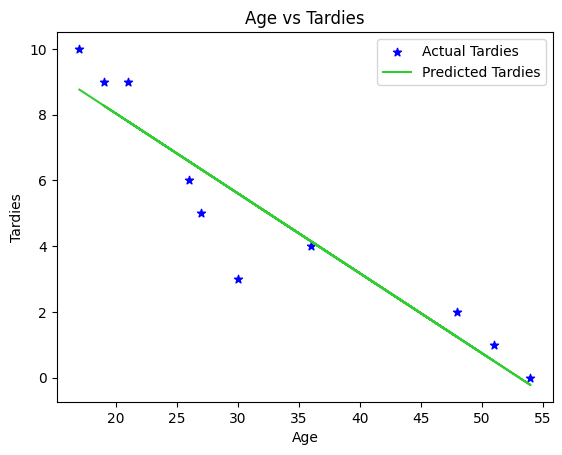

In [54]:
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', label='Actual Tardies', marker='*')
plt.plot(student_data['Age'], student_data['Predicted Tardies'], color='limegreen', label='Predicted Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [55]:
#Answers:

# - there is a negative relationship between 'Age' and 'Tardies'
# - predicted values (green line) are quite close to the actual data points (blue stars) and the predicted values are close to the actual observed values

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [56]:
vehicles = pd.read_csv(r"C:\Users\photo\Desktop\Ironhack\labs\week-7\lab-regression-analysis\vehicles.csv", encoding='latin1')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [57]:
vehicles_corr = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile' ]].corr()
vehicles_corr 

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [58]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

lr = LinearRegression()

lr.fit(X, y)

slope = lr.coef_
intercept = lr.intercept_

vehicles['Predicted CO2 Emissions'] = lr.predict(X)
print(f'Coefficients: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
Intercept: 769.8882836465675


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [59]:
# using SMF

results = smf.ols('vehicles["CO2 Emission Grams/Mile"] ~ Year + Cylinders + vehicles["Fuel Barrels/Year"] + vehicles["Combined MPG"] + vehicles["Fuel Cost/Year"]', data=vehicles).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     vehicles["CO2 Emission Grams/Mile"]   R-squared:                       0.981
Model:                                             OLS   Adj. R-squared:                  0.981
Method:                                  Least Squares   F-statistic:                 3.687e+05
Date:                                 Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                                         17:16:25   Log-Likelihood:            -1.5173e+05
No. Observations:                                35952   AIC:                         3.035e+05
Df Residuals:                                    35946   BIC:                         3.035e+05
Df Model:                                            5                                         
Covariance Type:                             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       769.8883     19.392     39.702      0.000     731.880     807.897
Year                             -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders                         1.8788      0.083     22.598      0.000       1.716       2.042
vehicles["Fuel Barrels/Year"]    19.0529      0.061    311.600      0.000      18.933      19.173
vehicles["Combined MPG"]         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
vehicles["Fuel Cost/Year"]        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
#using SM

X = sm.add_constant(X)

lr = sm.OLS(y, X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                             17:16:25   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [61]:
df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

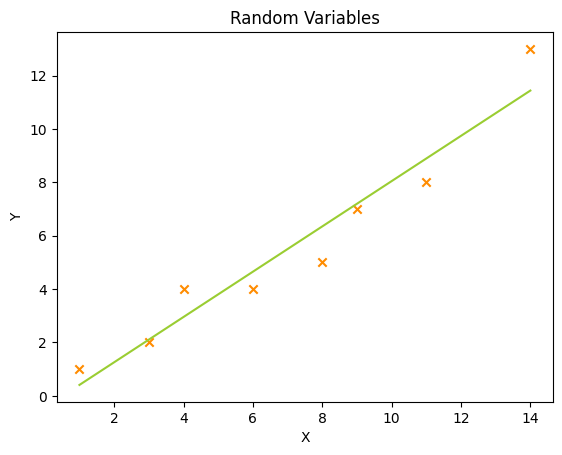

In [62]:
X = df[['X']]  
y = df['Y']  

lr = LinearRegression()

lr.fit(X, y)

slope = lr.coef_
intercept = lr.intercept_

df['Predicted Y'] = lr.predict(X)

plt.scatter(df['X'], df['Y'], marker='x', color='darkorange')
plt.plot(df['X'], df['Predicted Y'], color='yellowgreen')
plt.xlabel('X')
plt.ylabel('Y');
plt.title('Random Variables')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [63]:
# Answer: positive relationship between X and Y, as the values of Y increase as X increases

# Printing results

df

,X,Y,Predicted Y
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [79]:
## Based on the data, the most noticeable outlier appears to be the point (X=14, Y=13) where the predicted value (11.44) deviates from the actual Y value.
## It means that it might be influencing the model disproportionately. 

In [80]:
Q1 = df['Y'].quantile(0.25)
Q3 = df['Y'].quantile(0.75)

IQR = Q3 - Q1

outliers = df[(df['Y'] < (Q1 - 1.5 * IQR)) | (df['Y'] > (Q3 + 1.5 * IQR))]
print("Outliers:\n", outliers)

# removing outliers:
df_no_outliers = df[~df.index.isin(outliers.index)]
df_no_outliers

Outliers:
     X   Y  Predicted Y  Residuals
7  14  13    11.439394   1.560606


,X,Y,Predicted Y,Residuals
0,1,1,0.409091,0.590909
1,3,2,2.106061,-0.106061
2,4,4,2.954545,1.045455
3,6,4,4.651515,-0.651515
4,8,5,6.348485,-1.348485
5,9,7,7.196970,-0.196970
6,11,8,8.893939,-0.893939


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [72]:
# removing the outlier allows the regression model to fit better most of the data, having also smaller residuals.